In [1]:
using Pkg
pkg_folder = "../"
Pkg.activate(pkg_folder)
using BenchmarkTools
import Markdown; Base.showable(::MIME"text/markdown", ::Markdown.MD) = false # to make sth like """?replace"""  works for vscode backend, remember to choose Jupyter kernel
include(pkg_folder*"bnc_initialize.jl")
Threads.nthreads() # check number of threads

  Activating project at `~/Realizibility_index/bnc_julia`


24

In [55]:
# #binding
c=1
N = [c 1 -1]
x_sym = [:E, :S, :C]
q_sym = [:tE, :tS]
K_sym = [:K]

model = Bnc(N = N, x_sym=x_sym, q_sym=q_sym, K_sym=K_sym)

Bnc{Int8}([1 1 -1], [1 0 1; 0 1 1], 1, 3, 2, Num[E, S, C], Num[tE, tS], Num[K], nothing, Vector{Int8}[], Dict{Vector{Int8}, Int64}(), Bool[], Int8[], sparse(Int64[], Int64[], Int8[], 0, 0), sparse(Int64[], Int64[], SparseVector{Int8, Int8}[], 0, 0), sparse(Int64[], Int64[], SparseVector{Float64, Int8}[], 0, 0), Dict{Vector{Int8}, Any}(), Dict{Vector{Int8}, Tuple{SparseMatrixCSC{Float64, Int64}, Int8}}(), -1, [0.0, 0.0, 0.0], [0.3010299956639812, 0.3010299956639812, 0.0], false, sparse([1, 2, 1, 2], [1, 2, 3, 3], [1, 1, 1, 1], 2, 3), sparse([1, 3, 2, 3], [1, 1, 2, 2], [1, 1, 1, 1], 3, 2), sparse([1, 2, 1, 2], [1, 2, 3, 3], [1, 1, 1, 1], 2, 3), [[1, 3], [2, 3]], sparse([1, 1, 1], [1, 2, 3], [1, 1, -1], 1, 3), sparse([1, 3, 2, 3, 1, 2, 3], [1, 1, 2, 2, 3, 3, 3], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0], 3, 3), [1, 3, 5, 6], [1, 2, 1, 2], [1, 2, 3, 3], [2, 4, 7], [3, 3, 3], [1, 2, 3], SparseArrays.UMFPACK.UmfpackLU{Float64, Int64}(SparseArrays.UMFPACK.Symbolic{Float64, Int64}(Ptr{Nothing} @0x0

In [56]:
get_vertices_mapping_dict(model)

Start finding all vertices, it may takes a while.
Done, with 4 vertices found and 4 real vertices.


Dict{Vector{Int8}, Int64} with 4 entries:
  [1, 3] => 2
  [3, 3] => 4
  [1, 2] => 1
  [3, 2] => 3

In [57]:
get_vertices_neighbor_mat!(model)

Start calculating vertex neighbor matrix, It may takes a while.
Done.


4×4 SparseMatrixCSC{Int8, Int64} with 4 stored entries:
 ⋅  2  1  ⋅
 ⋅  ⋅  ⋅  1
 ⋅  ⋅  ⋅  2
 ⋅  ⋅  ⋅  ⋅

In [58]:
get_P_P0!(model,1)[1]

2×3 SparseMatrixCSC{Int64, Int64} with 2 stored entries:
 1  ⋅  ⋅
 ⋅  1  ⋅

In [59]:
get_P_P0!(model,2)[1]

2×3 SparseMatrixCSC{Int64, Int64} with 2 stored entries:
 1  ⋅  ⋅
 ⋅  ⋅  1

In [60]:
get_H!(model,1)

3×3 SparseMatrixCSC{Float64, Int64} with 5 stored entries:
 1.0   ⋅     ⋅ 
  ⋅   1.0    ⋅ 
 1.0  1.0  -1.0

In [61]:
get_H!(model,2)

3×3 SparseMatrixCSC{Float64, Int64} with 5 stored entries:
  1.0   ⋅    ⋅ 
 -1.0  1.0  1.0
   ⋅   1.0   ⋅ 

In [62]:
show_qK_space_constrains(model,2)

2-element Vector{Num}:
 (-log10(tS) + log10(tE)) > 0
   (log10(tE) - log10(K)) > 0

In [63]:
show_qK_space_constrains(model,1)

2-element Vector{Num}:
 (-log10(tS) + log10(K)) > 0
 (-log10(tE) + log10(K)) > 0

In [64]:
get_C_C0_qK!(model,1)[1]

2×3 SparseMatrixCSC{Float64, Int64} with 4 stored entries:
   ⋅   -1.0  1.0
 -1.0    ⋅   1.0

In [65]:
get_C_C0_qK!(model,2)[1]

2×3 SparseMatrixCSC{Float64, Int64} with 4 stored entries:
 1.0  -1.0    ⋅ 
 1.0    ⋅   -1.0

In [66]:
get_C_C0_x!(model,4)[1]

2×3 SparseMatrixCSC{Int64, Int64} with 4 stored entries:
 -1   ⋅  1
  ⋅  -1  1

In [67]:
get_C_C0_qK!(model,2)[1]

2×3 SparseMatrixCSC{Float64, Int64} with 4 stored entries:
 1.0  -1.0    ⋅ 
 1.0    ⋅   -1.0

In [68]:
m = get_C_C0_qK!(model,3)[1]

2×3 SparseMatrixCSC{Float64, Int64} with 4 stored entries:
   ⋅   1.0  -1.0
 -1.0  1.0    ⋅ 

In [69]:
min_logE = -6
min_logS = -6
max_logE = 6
max_logS = 6
K=1
points = 1000 # points each dimension
logE_rg = range(min_logE,max_logE,points)
logS_rg = range(min_logS,max_logS,points)


#  minE, minS;          minE,maxS;
#
#  maxE; minS;          maxE,maxS;

data = Matrix{Vector{Float64}}(undef, points,points)

# Calculate the first column
data[:,1] .= x_traj_with_q_change(model,[min_logE,min_logS],[max_logE,min_logS]; K=[K],input_logspace=true, output_logspace=true,saveat=range(0,1,points),ensure_manifold=false)[2]

#E conc for each row.
row_e = collect(range(min_logE, max_logE, length=points))

Threads.@threads for i in 1:points
    start_q = [row_e[i], min_logS]
    end_q = [row_e[i], max_logS]
    start_logx = data[i,1]
    data[i,1:end] .= x_traj_with_q_change(model, start_q, end_q; K=[K], startlogx = start_logx, input_logspace=true, output_logspace=true,saveat=range(0,1,points),ensure_manifold=false)[2]
end

In [70]:
using ImageFiltering
function find_bounds(lattice)
    col_asym_x_bounds = imfilter(lattice, Kernel.Laplacian(), "replicate") # findboundary
    edge_map = col_asym_x_bounds .!= 0
    return edge_map
end

find_bounds (generic function with 1 method)

In [71]:
# Find the regime of x

vtx_asym_x = data .|> x->assign_vertex_x(model, x,input_logspace=true; asymptotic=true)
vtx_nonasym_x = data .|> x->assign_vertex_x(model, x,input_logspace=true; asymptotic=false)
vtx_asym_qK = data .|> x->assign_vertex_qK(model, x,input_logspace=true ; asymptotic=true) 
vtx_nonasym_qK = data .|> x->assign_vertex_qK(model, x,input_logspace=true ; asymptotic=false)

col_asym_x = map(g -> model.vertices_idx[g], vtx_asym_x) #|> x -> reshape(x,shape_q)
col_nonasym_x = map(g -> model.vertices_idx[g], vtx_nonasym_x)# |> x -> reshape(x,shape_q)
col_asym_qK = map(g -> model.vertices_idx[g], vtx_asym_qK) #|> x -> reshape(x,shape_q)
col_nonasym_qK = map(g -> model.vertices_idx[g], vtx_nonasym_qK)# |> x -> reshape(x,shape_q)

bnds_asym_x = find_bounds(col_asym_x)
bnds_nonasym_x = find_bounds(col_nonasym_x)
bnds_asym_qK = find_bounds(col_asym_qK)
bnds_nonasym_qK = find_bounds(col_nonasym_qK)

(minval,maxval) = values(model.vertices_idx) |> x->(minimum(x),maximum(x))

print("Done")

Done

In [72]:
using GLMakie

f = Figure(size=(1500,1500))
p1 = Axis(f[1, 1])
p2 = Axis(f[1, 2])
p3 = Axis(f[2, 1])
p4 = Axis(f[2, 2])

# --- Plot 1: asymptotic_x ---
p1.title = "asymptotic_x"
heatmap!(p1, logE_rg, logS_rg, col_asym_x, colormap=:viridis, colorrange=(minval, maxval))
contour!(p1, logE_rg, logS_rg, bnds_nonasym_x,color = :black)
# --- Plot 2: nonasymptotic_x ---
p2.title = "nonasymptotic_x"
heatmap!(p2, logE_rg, logS_rg, col_nonasym_x, colormap=:viridis, colorrange=(minval, maxval))

# --- Plot 3: asymptotic_qK ---
p3.title = "asymptotic_qK"
heatmap!(p3, logE_rg, logS_rg, col_asym_qK, colormap=:viridis, colorrange=(minval, maxval))
contour!(p3, logE_rg, logS_rg, bnds_nonasym_x, color = :black)
lines!(p3, [-6,6], [-6,6], color=:white, linestyle=:dash)

# --- Plot 4: nonasymptotic_qK ---
p4.title = "nonasymptotic_qK"
heatmap!(p4, logE_rg, logS_rg, col_nonasym_qK, colormap=:viridis, colorrange=(minval, maxval))
contour!(p4, logE_rg, logS_rg, bnds_nonasym_x,color = :black)

for p in [p1, p2, p3, p4]
    # Add the red dot
    scatter!(p, [log10(K)/c], [log10(K)/c], marker=:circle, markersize=10, color=:red)
    # Set the axis labels (modern syntax)
    p.xlabel = "log10(tE)"
    p.ylabel = "log10(tS)"
end
Colorbar(f[:,end+1], colorrange = (minval, maxval))

display(f)

GLMakie.Screen(...)

Make sure directly calculate asym qK space is identical to qK mapping back x using P and calc asym x space.

In [48]:
using GLMakie
f = Figure(size=(1500,1500))
p1 = Axis(f[1, 1])
p2 = Axis(f[1, 2])
p3 = Axis(f[2, 1])
p4 = Axis(f[2, 2])


p1.title = "LogE"
heatmap!(p1, logE_rg, logS_rg, data .|> x->x[1], colormap=:viridis)
# contour!(p1, logE_rg, logS_rg, bnds_nonasym_x,color = :black)

p2.title = "LogS"
heatmap!(p2, logE_rg, logS_rg, data .|> x->x[2], colormap=:viridis)


p3.title = "LogC"
heatmap!(p3, logE_rg, logS_rg, data .|> x->x[3], colormap=:viridis)
# contour!(p3, logE_rg, logS_rg, bnds_nonasym_x, color = :black)
lines!(p3, [-6,6], [-6,6], color=:white, linestyle=:dash)


p4.title = "asymptotic_qK"
heatmap!(p4, logE_rg, logS_rg, col_asym_qK, colormap=:viridis, colorrange=(minval, maxval))
# contour!(p4, logE_rg, logS_rg, bnds_asym_qK, color = :black)

for p in [p1, p2, p3, p4]
    # Add the red dot
    scatter!(p, [log10(K)/c], [log10(K)/c], marker=:circle, markersize=10, color=:red)
    # Set the axis labels (modern syntax)
    p.xlabel = "log10(tE)"
    p.ylabel = "log10(tS)"
end
Colorbar(f[:,end+1], colorrange = (minval, maxval))

display(f)

GLMakie.Screen(...)

In [73]:
using GLMakie
f = Figure(size=(1500,1500))
p1 = Axis3(f[1, 1])
p2 = Axis3(f[1, 2])
p3 = Axis3(f[1, 3])
# p4 = Axis(f[2, 2])

p1.title = "LogE"
surface!(p1, logE_rg, logS_rg, data .|> x->x[1], colormap=:viridis)
# contour!(p1, logE_rg, logS_rg, bnds_nonasym_x,color = :black)

p2.title = "LogS"
surface!(p2, logE_rg, logS_rg, data .|> x->x[2], colormap=:viridis)

p3.title = "LogC"
surface!(p3, logE_rg, logS_rg, data .|> x->x[3], colormap=:viridis)
# contour!(p3, logE_rg, logS_rg, bnds_nonasym_x, color = :black)
# lines!(p3, [-6,6], [-6,6], color=:white, linestyle=:dash)

for p in [p1, p2, p3, ]
    # Add the red dot
    scatter!(p, [log10(K)/c], [log10(K)/c],[0], marker=:circle, markersize=10, color=:red)
    # Set the axis labels (modern syntax)
    p.xlabel = "log10(tE)"
    p.ylabel = "log10(tS)"
end
Colorbar(f[:,end+1], colorrange = (minval, maxval))

display(f)

GLMakie.Screen(...)

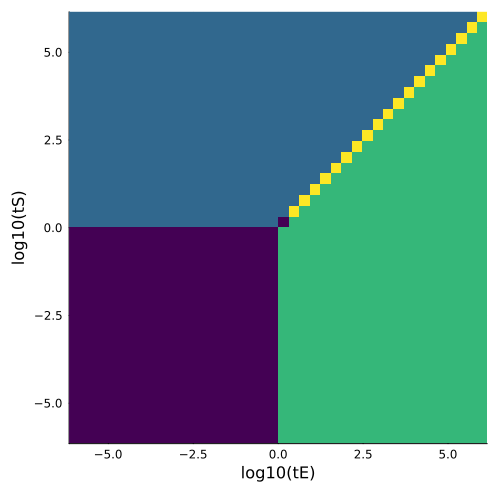

In [87]:
# col_asym_x 
# col_nonasym_x 
# col_asym_qK  
# col_nonasym_qK 

heatmap(logq_rg, logq_rg,col_nonasym_x ,size=(500,500),legend=false,colormap=:viridis)
# annotate!(-1.5,-1.5, "①")
# annotate!(-1.5,1.5, "②")
# annotate!(1.5,-1.5, "③")
# annotate!(1.5,1.5,"④")
xlabel!("log10(tE)")
ylabel!("log10(tS)")

In [34]:
# using ImageFiltering
# convolved_data = imfilter(labels_lattice, Kernel.Laplacian(), "replicate") # findboundary
# edge_map = convolved_data .!= 0
# print("Done")

# using Plots; #pythonplot()
   
# # scatter(log10.(q[:,1]),log10.(q[:,2]),zcolor = log10.(x[:,3]),
# #     xlabel="log10(tE)", ylabel="log10(tS)",
# #     # title="BNC model with K=1",
# #     xticks = (-2:0.5:2), yticks = (-2:0.5:2),
# #     clims = (0,3), c=:black, cbar=false,
# #     size = (700,600), legend=false)

# heatmap(logq_rg, logq_rg,log10.(reshape(x[:,3],shape)),colormap=:viridis,size=(500,500),)
# # plot!([-2,0],[0,0],line=(1.5,:dash,:red))
# # plot!([0,0],[-2,0],line=(1.5,:dash,:red))
# # plot!([0,2],[0,2],line=(1.5,:dash,:red),legend=false)
# contour!(logq_rg, logq_rg,edge_map,levels=[0.999],color=[:black],size = (500,500))
# # annotate!(-1.5,-1.5, "①")
# # annotate!(-1.5,1.5, "②")
# # annotate!(1.5,-1.5, "③")
# # annotate!(1.5,1.5,"④")

# # plot!([-2,0],[0,0],line=(4,:dash,0.6,:red))
# xlabel!("log10(tE)")
# ylabel!("log10(tS)")
# title!("log10C(tE,tS)")


In [ ]:
find_all_vertices!(model) |> length

4

In [ ]:
model = Bnc(L=L_generator(10,20))

Bnc{Int8}([1 1 … 0 0; 0 1 … 0 0; … ; 2 1 … -1 0; 0 0 … 0 -1], [1 0 … 2 0; 0 1 … 1 0; … ; 0 0 … 1 1; 0 0 … 1 0], 10, 20, 10, Num[x₁, x₂, x₃, x₄, x₅, x₆, x₇, x₈, x₉, x₁₀, x₁₁, x₁₂, x₁₃, x₁₄, x₁₅, x₁₆, x₁₇, x₁₈, x₁₉, x₂₀], Num[q₁, q₂, q₃, q₄, q₅, q₆, q₇, q₈, q₉, q₁₀], Num[K₁, K₂, K₃, K₄, K₅, K₆, K₇, K₈, K₉, K₁₀], nothing, Vector{Int8}[], Dict{Vector{Int8}, Int64}(), Bool[], Int8[], sparse(Int64[], Int64[], Bool[], 0, 0), sparse(Int64[], Int64[], Int8[], 0, 0), sparse(Int64[], Int64[], Int8[], 0, 0), Dict{Vector{Int8}, Any}(), 1, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.7781512503836436, 0.9030899869919435, 0.8450980400142568, 0.7781512503836436, 0.8450980400142568, 0.6989700043360189, 0.8450980400142568, 0.7781512503836436, 0.8450980400142568, 0.8450980400142568, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], false, sparse([1, 11, 16, 17, 19, 2, 11, 12, 13, 16  …  17, 19, 20, 10, 11, 15, 16, 17, 18, 19], [1, 1, 1, 1, 1, 2

In [ ]:
get_nonsingular_vertices_idx(model)[100]

194

In [ ]:
H = get_H!(model,194)

20×20 SparseMatrixCSC{Float64, Int64} with 70 stored entries:
⎡⠵⢄⠀⠈⠀⠁⠄⠀⠀⠁⎤
⎢⣀⢀⣑⣄⣀⡀⠀⠀⠀⡀⎥
⎢⣀⡀⠀⠠⠑⢀⡀⠀⡀⡀⎥
⎢⣀⢁⣂⣄⣢⡀⠐⢄⠀⡀⎥
⎣⣄⡑⡀⠊⡐⠁⡁⠀⠑⢀⎦

In [ ]:
Base.summarysize(model)

69051352

In [ ]:
get_C_C0_qK!(model,4)[1]

0×0 SparseMatrixCSC{Float64, Int64} with 0 stored entries

In [2]:
@variables C Et 

2-element Vector{Num}:
  C
 Et

In [8]:
mt = [1 - C/Et  0  C/Et
 0 1 0
 1 1 -1]

3×3 Matrix{Num}:
 1 + (-C) / Et  0  C / Et
             0  1       0
             1  1      -1

In [11]:
mt_inv = inv(mt) .|> simplify

3×3 Matrix{Num}:
 1.0       C / (-Et)         C / Et
   0             1.0              0
 1.0  (-C + Et) / Et  (C - Et) / Et

In [12]:
mt_inv[3,2]

(-C + Et) / Et